In [2]:
from model import Autoencoder, train_epoch, test_epoch
from utils import plot_ae_outputs

import torch

from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms


In [3]:
device = "mps" if torch.backends.mps.is_available() else "cpu"     # change to your device
device = torch.device(device)
print(f"Using device: {device}")

Using device: mps


In [4]:
transform=transforms.Compose([transforms.ToTensor()])#transforms.Normalize((0.4914, 0.4822, 0.4466), (0.247, 0.243, 0.261))])

batch_size=32

train_dataset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

train_targets = torch.Tensor(train_dataset.targets)
test_targets = torch.Tensor(test_dataset.targets)

train_indices = list(range(9000))
test_indices = list(range(1000))

train_dataset = torch.utils.data.Subset(train_dataset, train_indices)    # downsampling
test_dataset = torch.utils.data.Subset(test_dataset, test_indices)

train_data, val_data = random_split(train_dataset, [8000, 1000])

train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
loss_fn = torch.nn.MSELoss()
lr= 0.0005

torch.manual_seed(0)

model = Autoencoder()
optim = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-05)

model.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


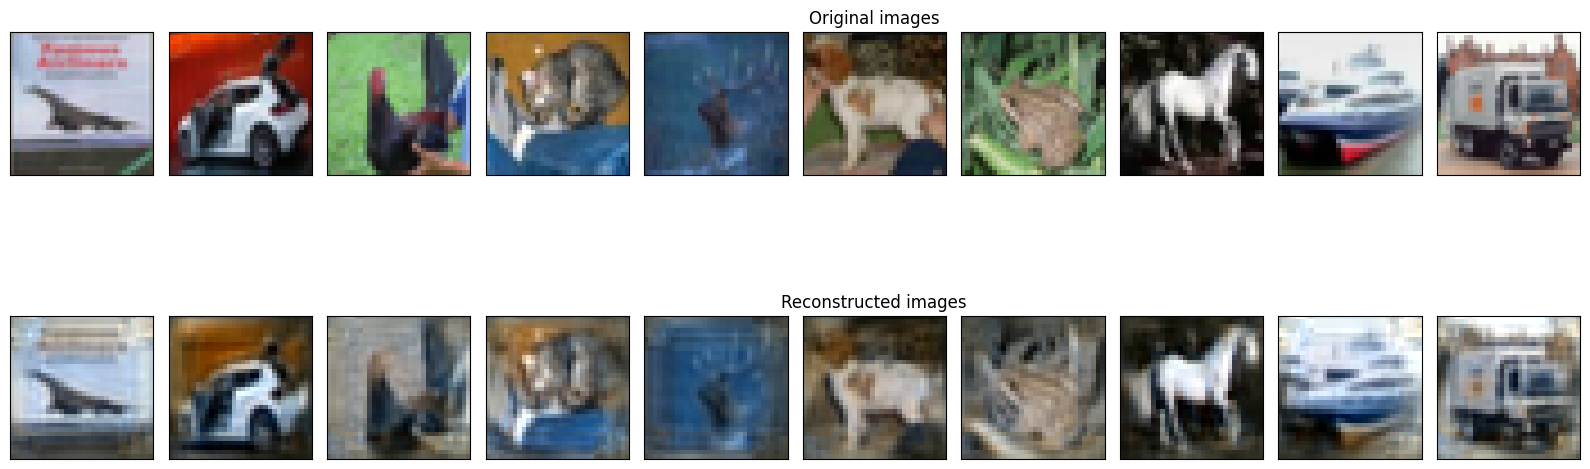

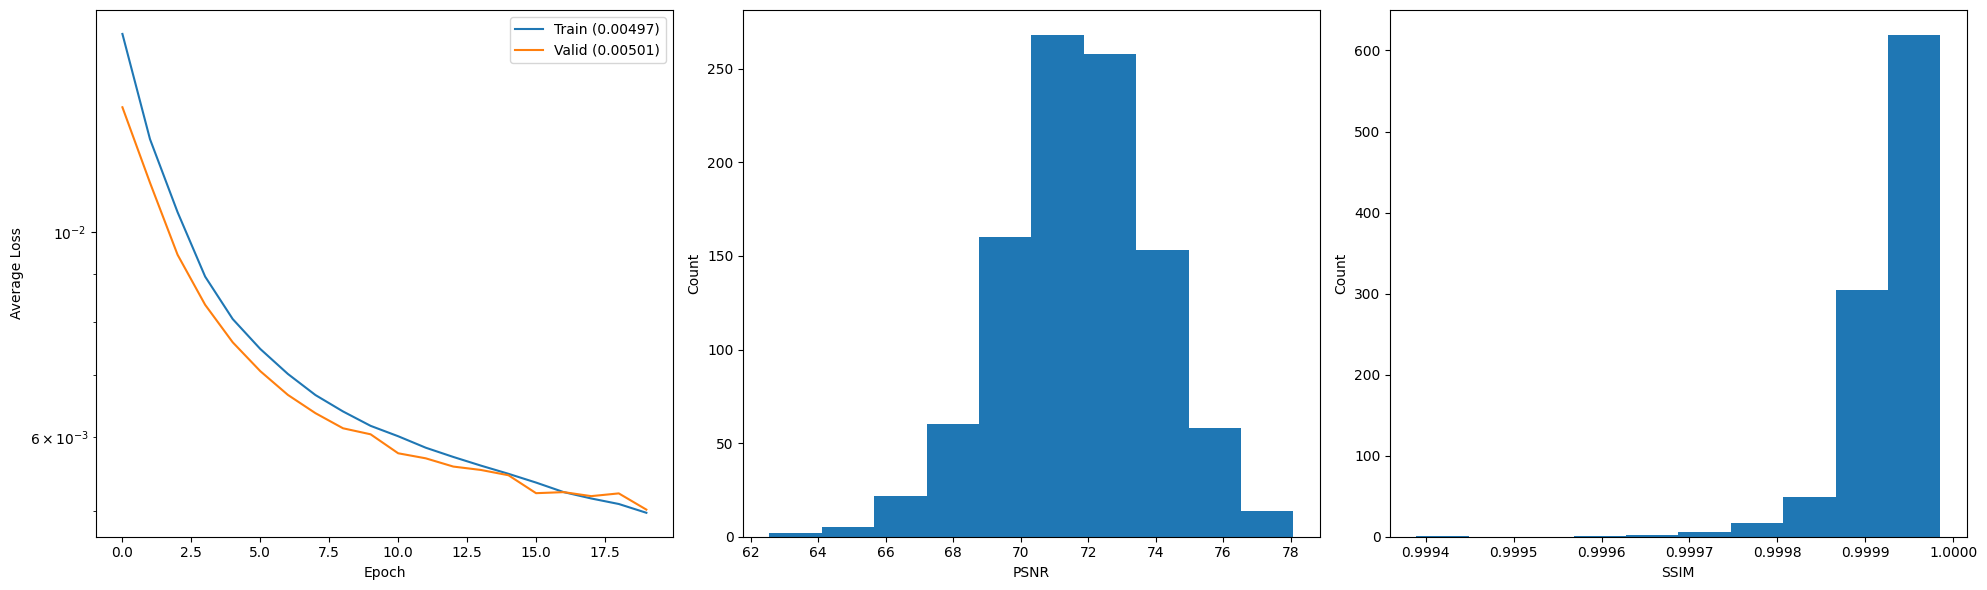

In [7]:
num_epochs = 20
diz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
   train_loss = train_epoch(model,device,train_loader,loss_fn,optim)
   val_loss = test_epoch(model,device,valid_loader,loss_fn)
   diz_loss['train_loss'].append(train_loss)
   diz_loss['val_loss'].append(val_loss)
   plot_ae_outputs(model,diz_loss,device,test_dataset,test_targets , test_indices, key='CIFAR10', n=10)
   

In [8]:
test_epoch(model,device,test_loader,loss_fn).item()

0.005013226997107267